In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import re
import json

In [2]:
# fp = './data/tweets.csv'
# fp = './data/tweets.xlsx'
# fp = './data/les_miserables.json'
fp = './data/lesmiserables.gml'
# fp = './data/cpan-authors.gexf'

In [3]:
from modules.document_processing import DataFrameGraphProcessing
from modules.etl import DocumentOpener, GMLReader

In [4]:
# p = DocumentGraphProcessing(fp)
p = DocumentOpener(fp)

In [5]:
# p = DocumentGraphProcessing(fp,'handle', 'original_author', min_deg = 1)

In [6]:
p.FILEPATH

'./data/lesmiserables.gml'

In [7]:
p.df

In [9]:
p.NODELIST

,id,label
0,0,Myriel
1,1,Napoleon
2,2,MlleBaptistine
3,3,MmeMagloire
4,4,CountessDeLo
...,...,...
72,72,Toussaint
73,73,Child1
74,74,Child2
75,75,Brujon


In [10]:
p.EDGELIST

,source,target,value
0,1,0,1
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
...,...,...,...
249,76,66,1
250,76,63,1
251,76,62,1
252,76,48,1


In [11]:
# p.detect_filetype()

In [12]:
p.file_ext

'gml'

In [13]:
p.df

In [14]:
p.draw()

AttributeError: 'DocumentOpener' object has no attribute 'draw'

In [11]:
p.n_nodes

278

In [12]:
p.centrality.sort_values('betweenness', ascending = False)

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryClinton,0.815884,0.725131,0.961165,0.718771,227
realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
GMA,0.007220,0.501812,0.154594,0.046990,2
Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
HillaryforAZ,0.003610,0.420973,0.000000,0.046444,1
...,...,...,...,...,...
repjohnlewis,0.003610,0.420973,0.000000,0.046444,1
EricTrump,0.003610,0.277555,0.000000,0.000546,1
mpshapiro,0.003610,0.420973,0.000000,0.046444,1
BishopGarrison,0.003610,0.420973,0.000000,0.046444,1


In [14]:
p.NODELIST

,node_name,id,text,is_retweet,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,lang,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
1,HillaryClinton,780916180899037184,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
11,realDonaldTrump,780867418012979204,"On National #VoterRegistrationDay, make sure y...",True,2016-09-27T20:31:14,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '11134252', 'nam...",NaN
1,timkaine,780916180899037184,"Last night, Donald Trump said not paying taxes...",True,2016-09-27T23:45:00,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,POTUS,780911564857761793,Couldn't be more proud of @HillaryClinton. Her...,True,2016-09-27T23:26:40,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
9,mcuban,780874710049550336,3) Has Trump offered a single proposal to redu...,True,2016-09-27T21:00:13,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '16228398', 'nam...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6003,ErinBurnett,694257857546559488,Sat down w/ @EricTrump @DonaldJTrumpJr here in...,True,2016-02-01T20:35:46,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '322603418', 'na...",NaN
6143,GeraldoRivera,691686187795378176,#NewYork tromps #Jonas. Day after storm of the...,True,2016-01-25T18:16:52,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,"{'user_mentions': [{'id_str': '246500501', 'na...",NaN
6223,williebosshog,690404308010057728,Make America Great Again! #Trump2016 https://t...,True,2016-01-22T05:23:08,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,{'media': [{'display_url': 'pic.twitter.com/1h...,{'media': [{'display_url': 'pic.twitter.com/1h...
6249,SarahPalinUSA,689870751374016512,Trading in the beautiful snow of Iowa for the ...,True,2016-01-20T18:02:58,NaN,NaN,NaN,False,en,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com/download/iphone,False,"{'user_mentions': [{'id_str': '65493023', 'nam...",NaN


In [15]:
p.EDGELIST

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [16]:
p.centrality

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryforAZ,0.00361,0.420973,0.0,0.046444,1
RepJohnLarson,0.00361,0.420973,0.0,0.046444,1
CWAUnion,0.00361,0.420973,0.0,0.046444,1
HillaryforVA,0.00361,0.420973,0.0,0.046444,1
SophiaBush,0.00361,0.420973,0.0,0.046444,1
...,...,...,...,...,...
emgrundy,0.00361,0.420973,0.0,0.046444,1
LSD_Esq,0.00361,0.420973,0.0,0.046444,1
SenGillibrand,0.00361,0.420973,0.0,0.046444,1
AdrianaCohen16,0.00361,0.277555,0.0,0.000546,1


In [17]:
p.filter_graph_degree()

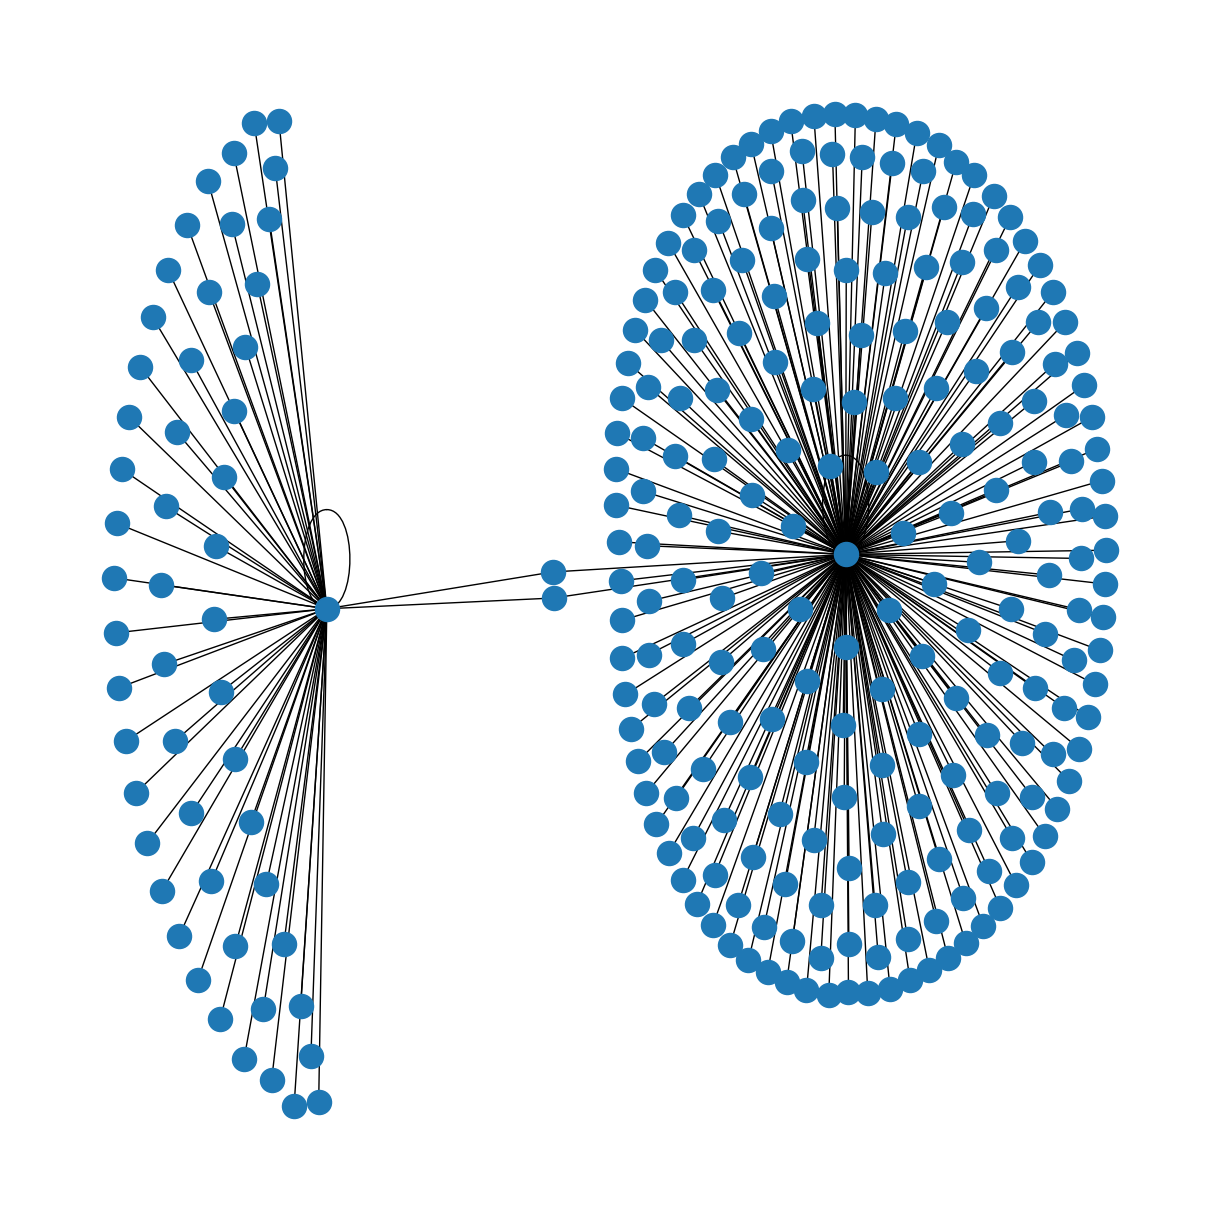

In [18]:
p.draw(scope='full')

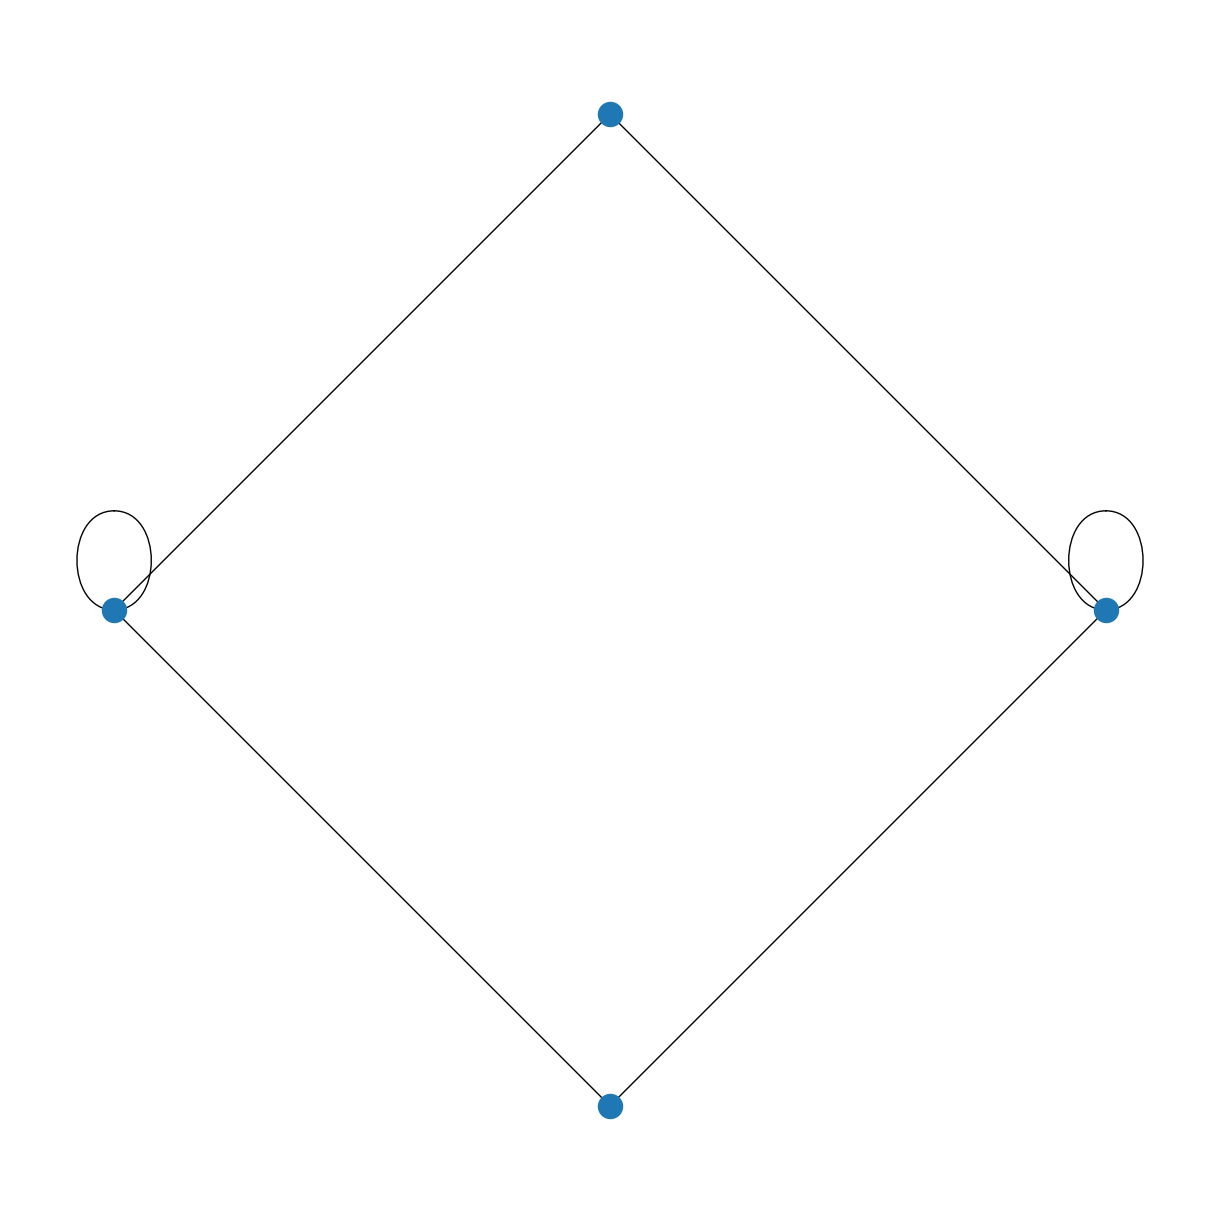

In [19]:
p.draw(scope='subgraph')

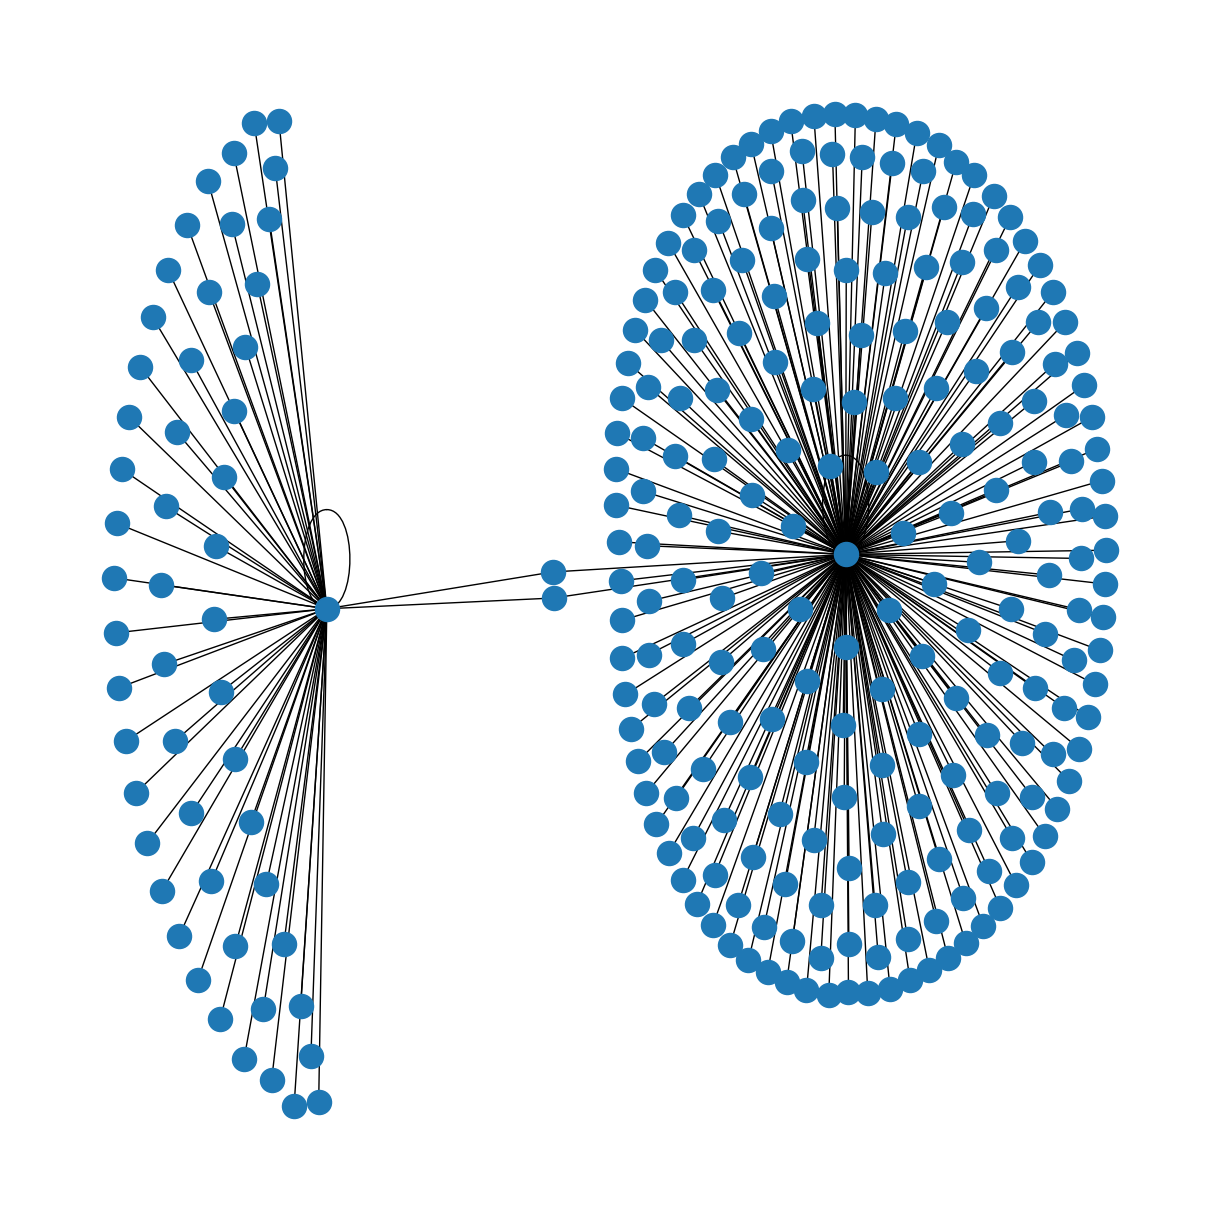

In [23]:
import matplotlib.pyplot as plt

p.draw(scope='full')
plt.savefig('test.png')

In [24]:
plt.savefig("output.png")

<Figure size 640x480 with 0 Axes>

## File out

In [25]:
# p.write_csv()

## Edge and Node Lists

In [26]:
pd.DataFrame(p.all_edges, columns = [p.source_col, p.sink_col])

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [27]:
p.EDGELIST

,handle,original_author
0,HillaryClinton,timkaine
1,HillaryClinton,POTUS
2,HillaryClinton,mcuban
3,HillaryClinton,ddlovato
4,realDonaldTrump,GOP
...,...,...
717,realDonaldTrump,SarahPalinUSA
718,realDonaldTrump,EricTrump
719,realDonaldTrump,JaniceTaylor912
720,realDonaldTrump,DRUDGE_REPORT


In [28]:
source_node_cols = [p.source_col] + [col for col in p.df.columns if (col != p.source_col) and (col != p.sink_col)]
source_node_cols

['handle',
 'id',
 'text',
 'is_retweet',
 'time',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'retweet_count',
 'favorite_count',
 'longitude',
 'latitude',
 'place_id',
 'place_full_name',
 'place_name',
 'place_type',
 'place_country_code',
 'place_country',
 'place_contained_within',
 'place_attributes',
 'place_bounding_box',
 'source_url',
 'truncated',
 'entities',
 'extended_entities']

In [29]:
sink_node_cols = [p.sink_col] + [col for col in p.df.columns if (col != p.source_col) and (col != p.sink_col)]
sink_node_cols

['original_author',
 'id',
 'text',
 'is_retweet',
 'time',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'is_quote_status',
 'lang',
 'retweet_count',
 'favorite_count',
 'longitude',
 'latitude',
 'place_id',
 'place_full_name',
 'place_name',
 'place_type',
 'place_country_code',
 'place_country',
 'place_contained_within',
 'place_attributes',
 'place_bounding_box',
 'source_url',
 'truncated',
 'entities',
 'extended_entities']

In [30]:
nodelist_df = pd.concat([
    df_sub[source_node_cols].rename(columns = {'handle': 'node_name'}),
    df_sub[sink_node_cols].rename(columns = {'original_author': 'node_name'})
])

NameError: name 'df_sub' is not defined

In [31]:
nodelist_df.drop_duplicates(subset = ['node_name'])

NameError: name 'nodelist_df' is not defined

## Centrality Measurements

In [32]:
deg = nx.degree_centrality(p.g)

In [33]:
closeness = nx.closeness_centrality(p.g)

In [34]:
betweenness = nx.betweenness_centrality(p.g)

In [35]:
eigen = nx.eigenvector_centrality(p.g)

In [36]:
cen = pd.DataFrame([deg, closeness, betweenness, eigen]).transpose()
cen.columns = ['degree', 'closeness', 'betweenness', 'eigenvector']
cen['degree_nonnormal'] = cen.degree.apply(lambda x: int(round(x * p.n_nodes)))

In [37]:
cen

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryforAZ,0.00361,0.420973,0.0,0.046444,1
RepJohnLarson,0.00361,0.420973,0.0,0.046444,1
CWAUnion,0.00361,0.420973,0.0,0.046444,1
HillaryforVA,0.00361,0.420973,0.0,0.046444,1
SophiaBush,0.00361,0.420973,0.0,0.046444,1
...,...,...,...,...,...
emgrundy,0.00361,0.420973,0.0,0.046444,1
LSD_Esq,0.00361,0.420973,0.0,0.046444,1
SenGillibrand,0.00361,0.420973,0.0,0.046444,1
AdrianaCohen16,0.00361,0.277555,0.0,0.000546,1


In [38]:
p.centrality.sort_values('degree_nonnormal', ascending = False)

,degree,closeness,betweenness,eigenvector,degree_nonnormal
HillaryClinton,0.815884,0.725131,0.961165,0.718771,227
realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
GMA,0.007220,0.501812,0.154594,0.046990,2
Morning_Joe,0.007220,0.501812,0.154594,0.046990,2
HillaryforAZ,0.003610,0.420973,0.000000,0.046444,1
...,...,...,...,...,...
repjohnlewis,0.003610,0.420973,0.000000,0.046444,1
EricTrump,0.003610,0.277555,0.000000,0.000546,1
mpshapiro,0.003610,0.420973,0.000000,0.046444,1
BishopGarrison,0.003610,0.420973,0.000000,0.046444,1


In [39]:
df = cen.loc[(cen.degree_nonnormal > 1) & (cen.degree_nonnormal < 227)].reset_index(drop=False)
df

,index,degree,closeness,betweenness,eigenvector,degree_nonnormal
0,GMA,0.007220,0.501812,0.154594,0.046990,2
1,realDonaldTrump,0.202166,0.383657,0.340776,0.008455,56
2,Morning_Joe,0.007220,0.501812,0.154594,0.046990,2


In [40]:
df.columns = ['node_name'] + list(df.columns)[1:]

In [41]:
df.node_name

0                GMA
1    realDonaldTrump
2        Morning_Joe
Name: node_name, dtype: object

In [42]:
g = nx.induced_subgraph(p.g, df.node_name)

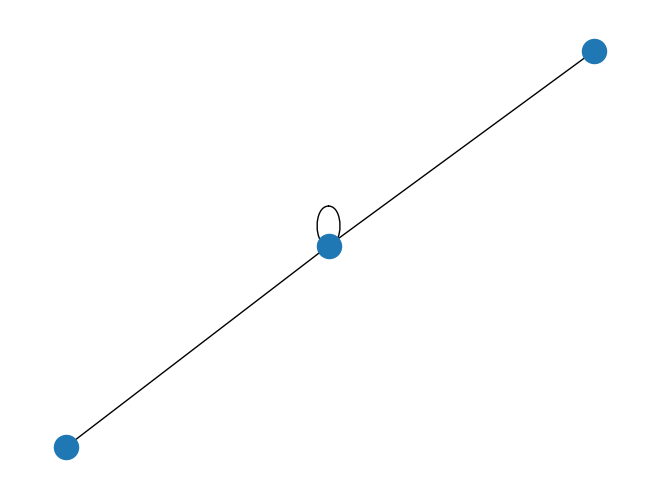

In [43]:
nx.draw_kamada_kawai(g)

In [44]:
pd.to_excel('test.xlsx')

AttributeError: module 'pandas' has no attribute 'to_excel'

In [45]:
pd.ExcelWriter("output.xlsx")

In [46]:
p.EDGELIST.to_excel('testing.xlsx')

In [47]:
t = p.NODELIST.to_json()
t

ValueError: DataFrame index must be unique for orient='columns'.

In [55]:
pd.DataFrame(dict=t)

TypeError: __init__() got an unexpected keyword argument 'dict'

'{"handle":{"0":"HillaryClinton","1":"HillaryClinton","2":"HillaryClinton","3":"HillaryClinton","4":"realDonaldTrump","5":"HillaryClinton","6":"HillaryClinton","7":"HillaryClinton","8":"HillaryClinton","9":"HillaryClinton","10":"HillaryClinton","11":"HillaryClinton","12":"HillaryClinton","13":"HillaryClinton","14":"HillaryClinton","15":"HillaryClinton","16":"HillaryClinton","17":"HillaryClinton","18":"realDonaldTrump","19":"HillaryClinton","20":"realDonaldTrump","21":"realDonaldTrump","22":"HillaryClinton","23":"HillaryClinton","24":"realDonaldTrump","25":"HillaryClinton","26":"HillaryClinton","27":"realDonaldTrump","28":"realDonaldTrump","29":"HillaryClinton","30":"HillaryClinton","31":"HillaryClinton","32":"realDonaldTrump","33":"HillaryClinton","34":"realDonaldTrump","35":"HillaryClinton","36":"HillaryClinton","37":"realDonaldTrump","38":"HillaryClinton","39":"HillaryClinton","40":"HillaryClinton","41":"HillaryClinton","42":"HillaryClinton","43":"HillaryClinton","44":"HillaryClinton